In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['VATEJARAT', 'VATOOKA', 'KHODRO', 'FEOLAD']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Get the stock quote
features= ['<DTYYYYMMDD>','<OPEN>','<HIGH>','<LOW>','<CLOSE>','<VOL>', 'Name']
data = pd.read_csv('close.csv', usecols= features, parse_dates=True)
data.rename(columns={'<DTYYYYMMDD>':'Time'}, inplace=True)
data = data.set_index('Time')


In [ ]:
# Rename Columns
df = data.rename(columns={'<DTYYYYMMDD>':'Time','<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Volume'})
df

In [ ]:
globals()['VATEJARAT'] = df.loc[df['Name'] == 'VATEJARAT']
globals()['VATOOKA'] = df.loc[df['Name'] == 'VATOOKA']
globals()['KHODRO'] = df.loc[df['Name'] == 'KHODRO']
globals()['FEOLAD'] = df.loc[df['Name'] == 'FEOLAD']
# Show teh data
df

In [ ]:
company_list = [VATEJARAT, VATOOKA, KHODRO, FEOLAD]
company_name = ['VATEJARAT', 'VATOOKA', 'KHODRO', 'FEOLAD']

In [ ]:
# Summary Stats
VATEJARAT.describe()

In [ ]:
# General info
VATEJARAT.info()

In [ ]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.yscale('log')
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

VATEJARAT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('VATEJARAT')

VATOOKA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('VATOOKA')

KHODRO[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('KHODRO')

FEOLAD[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('FEOLAD')

fig.tight_layout()

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

VATEJARAT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('VATEJARAT')

VATOOKA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('VATOOKA')

KHODRO['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('KHODRO')

FEOLAD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('FEOLAD')

fig.tight_layout()

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

### What was the correlation between different stocks closing prices?


Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [5]:
df = pd.read_csv('close.csv', parse_dates=True)
df

,<DTYYYYMMDD>,Abada,Abin,Afagh,Afra,Afran,Agas,Ahrom,Akhaber,Akontor,...,Zekesht,Zekosar,Zemagsa,Zemahan,Zemalard,Zepars,Zeshagza,Zesharif,Zeytoun,Zob
0,20010325,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
1,20010326,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
2,20010327,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
3,20010328,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
4,20010331,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,20220815,9030.0,7380.0,10137.0,18890.0,17208.0,84719.0,11200.0,6820.0,45893.0,...,25250.0,12600.0,19030.0,6480.0,10180.0,39040.0,4795.0,3644.0,12340.0,2787.0
5162,20220816,8920.0,7380.0,10142.0,18150.0,17219.0,83468.0,11080.0,7170.0,45893.0,...,26550.0,13310.0,19510.0,6440.0,10610.0,39070.0,4720.0,3541.0,12330.0,2824.0
5163,20220817,8920.0,7380.0,10150.0,18800.0,17229.0,82700.0,11080.0,7090.0,45893.0,...,27450.0,13240.0,20380.0,6480.0,10940.0,40500.0,4800.0,3680.0,12300.0,2833.0
5164,20220820,8840.0,7380.0,10165.0,18320.0,17259.0,82110.0,10600.0,6880.0,45893.0,...,27800.0,13140.0,21220.0,6610.0,11410.0,40900.0,4800.0,3815.0,12300.0,2728.0


In [6]:
# Grab all the closing prices for the tech stock list into one DataFrame
#tech_list = ['Vatejarat', 'Vatooka', 'Khodro', 'Feolad']
#df = pd.read_csv('close.csv', usecols= tech_list, parse_dates=True)
closing_df = df

# Let's take a quick look
closing_df.head() 

,<DTYYYYMMDD>,Abada,Abin,Afagh,Afra,Afran,Agas,Ahrom,Akhaber,Akontor,...,Zekesht,Zekosar,Zemagsa,Zemahan,Zemalard,Zepars,Zeshagza,Zesharif,Zeytoun,Zob
0,20010325,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
1,20010326,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
2,20010327,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
3,20010328,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0
4,20010331,14037.0,156.0,10000.0,307.0,10000.0,10000.0,10000.0,192.0,168.0,...,1883.0,11212.0,13.0,1307.0,8131.0,739.0,241.0,813.0,10000.0,160.0




Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.


In [7]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

,<DTYYYYMMDD>,Abada,Abin,Afagh,Afra,Afran,Agas,Ahrom,Akhaber,Akontor,...,Zekesht,Zekosar,Zemagsa,Zemahan,Zemalard,Zepars,Zeshagza,Zesharif,Zeytoun,Zob
5161,4.945399e-08,0.029647,0.029289,0.000691,0.051782,0.000523,0.008560,0.028466,0.057364,0.0,...,0.058700,0.016949,0.056635,0.007776,0.018000,0.001026,0.007565,0.030252,0.000000,0.040702
5162,4.945399e-08,-0.012182,0.000000,0.000493,-0.039174,0.000639,-0.014766,-0.010714,0.051320,0.0,...,0.051485,0.056349,0.025223,-0.006173,0.042240,0.000768,-0.015641,-0.028266,-0.000810,0.013276
5163,4.945399e-08,0.000000,0.000000,0.000789,0.035813,0.000581,-0.009201,0.000000,-0.011158,0.0,...,0.033898,-0.005259,0.044593,0.006211,0.031103,0.036601,0.016949,0.039254,-0.002433,0.003187
5164,1.483620e-07,-0.008969,0.000000,0.001478,-0.025532,0.001741,-0.007134,-0.043321,-0.029619,0.0,...,0.012750,-0.007553,0.041217,0.020062,0.042962,0.009877,0.000000,0.036685,0.000000,-0.037063
5165,4.945398e-08,-0.018100,0.000000,0.000590,0.049672,0.000521,-0.003374,-0.008491,0.011628,0.0,...,-0.062950,-0.018265,0.025919,0.009077,0.043821,0.020293,0.054792,-0.005242,0.001626,-0.027493


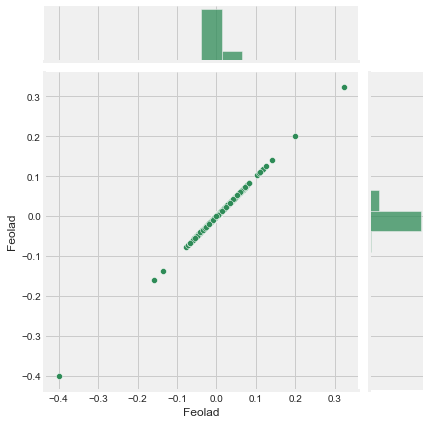

In [19]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='Feolad', y='Feolad', data=tech_rets, kind='scatter', color='seagreen')

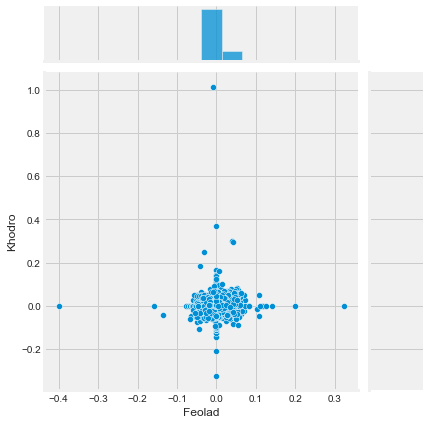

In [20]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='Feolad', y='Khodro', data=tech_rets, kind='scatter')

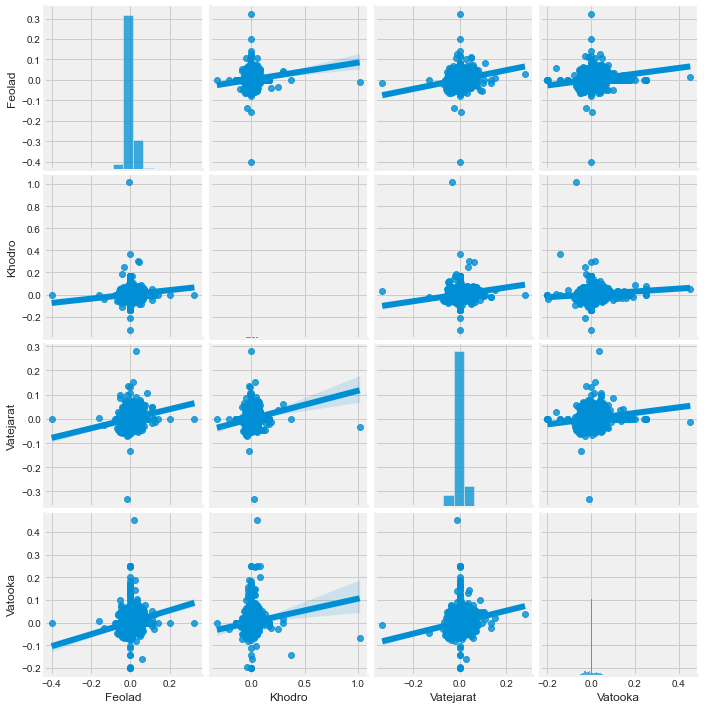

In [10]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

KeyboardInterrupt: 

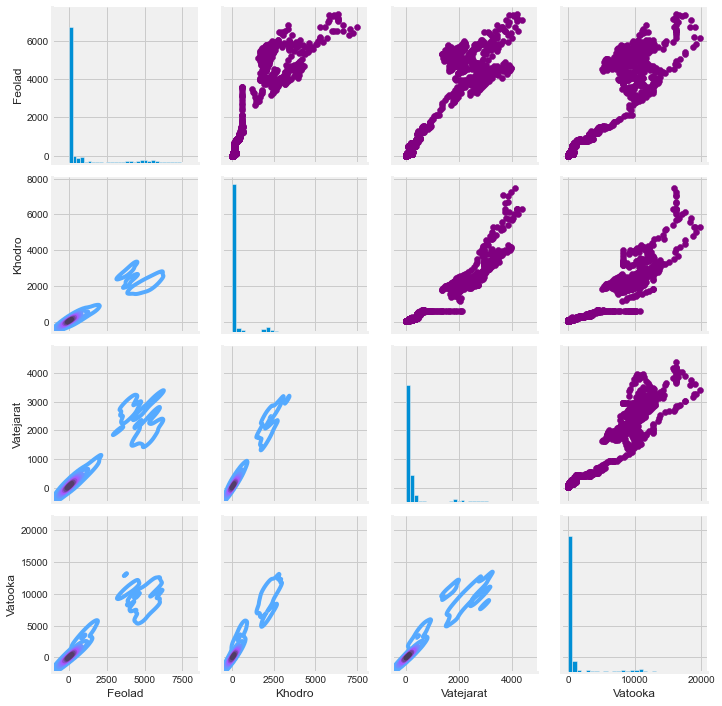

In [12]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [1]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

NameError: name 'sns' is not defined

### How much value do we put at risk by investing in a particular stock?


There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


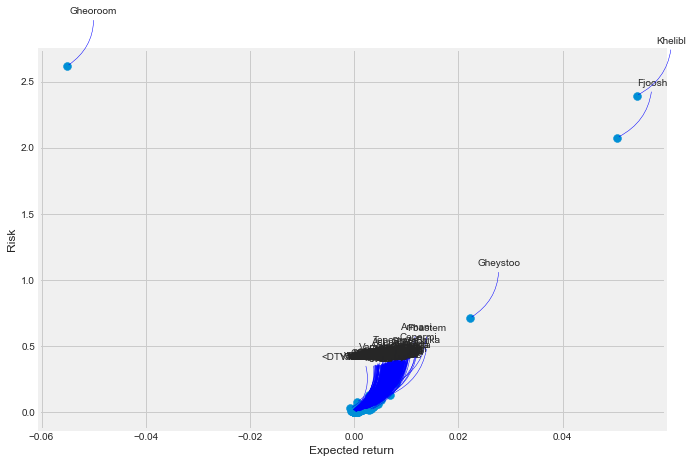

In [8]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Predicting the closing price stock price of APPLE inc:

In [ ]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #60 days for test data
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

# Build the LSTM model
model = Sequential()
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16, return_sequences=True))
model.add(GRU(8, return_sequences=False, dropout=0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid